In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
# Set style for seaborn
sns.set(style='whitegrid')

# Generate synthetic customer data
np.random.seed(42)

# Create synthetic features: Annual Income and Spending Score
n_samples = 500
annual_income = np.random.normal(loc=60, scale=30, size=n_samples)  # in thousands
spending_score = np.random.normal(loc=50, scale=25, size=n_samples)  # scale from 1 to 100

# Ensure values are within realistic ranges
annual_income = np.clip(annual_income, 10, 150)
spending_score = np.clip(spending_score, 1, 100)

# Combine into a DataFrame
customer_data = pd.DataFrame({
    'CustomerID': np.arange(1, n_samples + 1),
    'AnnualIncome': annual_income,
    'SpendingScore': spending_score
})


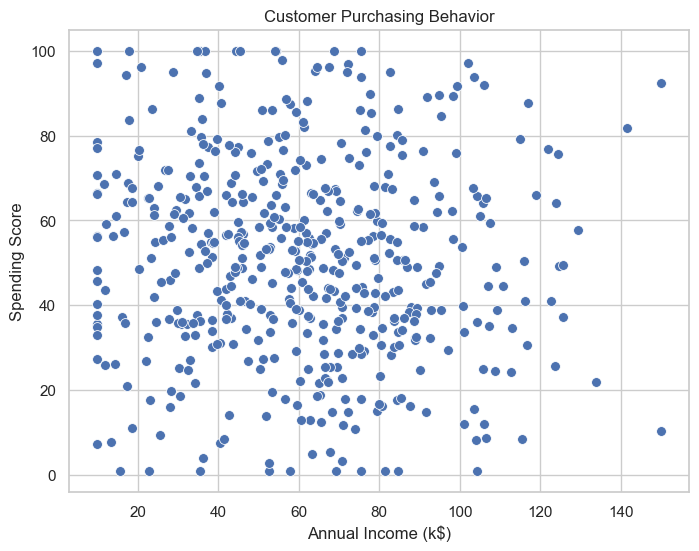

In [3]:
# Visualize the data
plt.figure(figsize=(8, 6))
sns.scatterplot(data=customer_data, x='AnnualIncome', y='SpendingScore', s=50)
plt.title('Customer Purchasing Behavior')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.savefig('customer_data_scatter.png')
plt.show()


In [4]:
# Data Preprocessing
X = customer_data[['AnnualIncome', 'SpendingScore']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Affinity Propagation Clustering
# Default preference is median of input similarities
affinity_propagation = AffinityPropagation(random_state=42)
affinity_propagation.fit(X_scaled)

# Cluster labels
cluster_labels = affinity_propagation.labels_
n_clusters = len(np.unique(cluster_labels))
print(f'Number of clusters found: {n_clusters}')

# Add cluster labels to the data
customer_data['Cluster'] = cluster_labels


Number of clusters found: 25


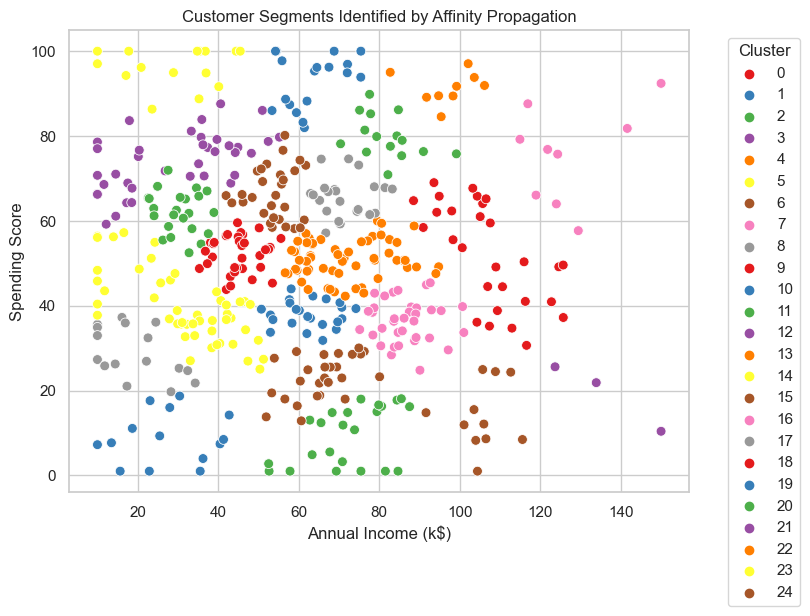

Silhouette Score: 0.34

Cluster Centers (Exemplars):
     AnnualIncome  SpendingScore  Cluster
8       45.915768      51.213041        0
26      25.470193       9.311439        1
64      84.375775      80.030348        2
113    133.897263      21.862774        3
141     99.214283      91.725538        4
147     20.386302      48.642628        5
192     66.422812      22.973417        6
234    124.318323      75.728891        7
250     22.173481      26.919169        8
256     98.007334      62.332948        9
269     63.922217      95.311214       10
275     73.863104      10.744382       11
295     39.212712      76.328821       12
302     82.418808      52.403019       13
348     38.446673      34.056500       14
361    105.982167      12.106397       15
376     86.169619      37.059718       16
386     70.252679      64.598205       17
387    116.285125      41.017698       18
435     62.222843      37.448644       19
457     28.942730      61.418830       20
472     14.544268      

In [6]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=customer_data, x='AnnualIncome', y='SpendingScore', hue='Cluster', palette='Set1', s=50)
plt.title('Customer Segments Identified by Affinity Propagation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc=2)
plt.savefig('customer_clusters.png')
plt.show()

# Evaluate clustering performance using Silhouette Score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Analyze the clusters
print("\nCluster Centers (Exemplars):")
exemplar_indices = affinity_propagation.cluster_centers_indices_
exemplars = customer_data.iloc[exemplar_indices]
print(exemplars[['AnnualIncome', 'SpendingScore', 'Cluster']])

# Adjusting the preference parameter to control the number of clusters
from sklearn.metrics import pairwise_distances

# Compute similarity matrix
similarity_matrix = -pairwise_distances(X_scaled, metric='euclidean')

# Adjust preference to change the number of clusters
preference = np.median(similarity_matrix) * 1.2  # Increase preference to get more clusters

affinity_propagation_adjusted = AffinityPropagation(preference=preference, random_state=42)
affinity_propagation_adjusted.fit(X_scaled)
cluster_labels_adjusted = affinity_propagation_adjusted.labels_
n_clusters_adjusted = len(np.unique(cluster_labels_adjusted))
print(f'\nNumber of clusters after adjusting preference: {n_clusters_adjusted}')

# Add adjusted cluster labels to the data
customer_data['Cluster_Adjusted'] = cluster_labels_adjusted
